In [15]:
# Import Modules
import numpy as np # For Math
import pandas as pd # For Data Structures
import matplotlib as mpl # For Plotting Tools Library
import matplotlib.pyplot as plt # For Plotting
from pylab import cm # For Colors
from astropy.timeseries import LombScargle # For FFT Analysis
import os # For interacting with Operating System


# import time as TIME
# import csv
# from astropy.convolution import convolve, Box1DKernel
# from scipy.signal import medfilt
# import math

Opening F Type Stars
Opening G Type Stars
Opening K Type Stars


/var/folders/9z/6fm19mhn2gd982jqv4xqxpvr0000gn/T/ipykernel_12295/2943747572.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Opening M Type Stars


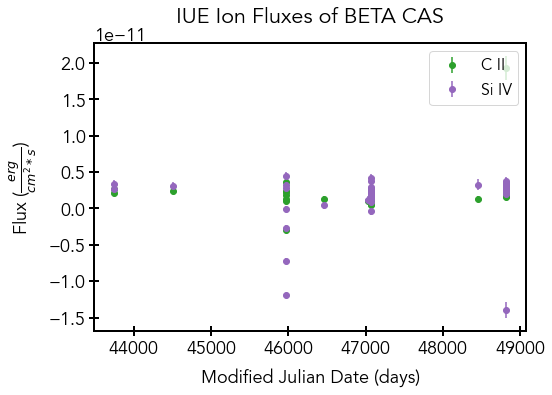

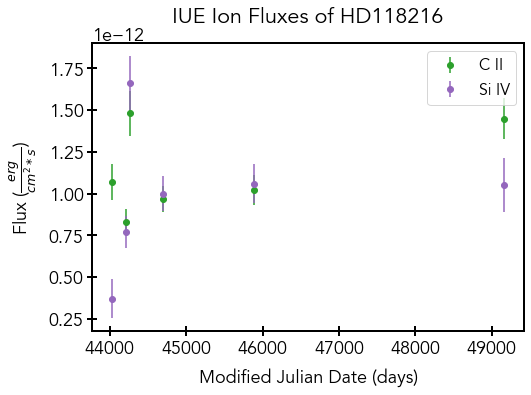

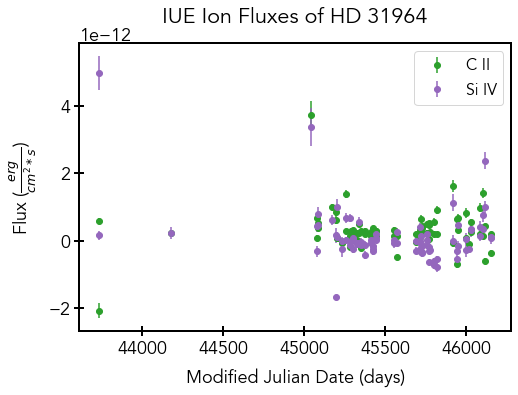

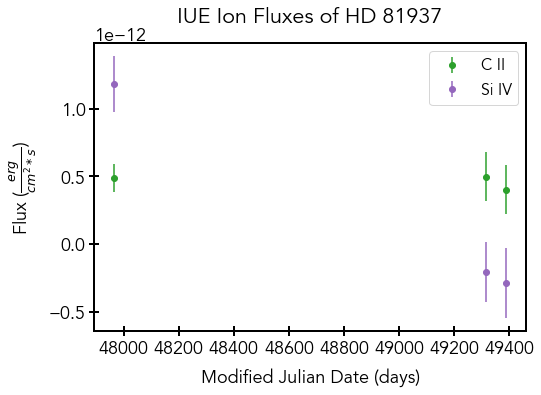

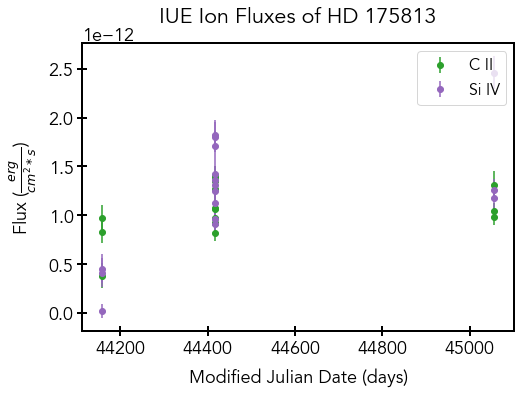

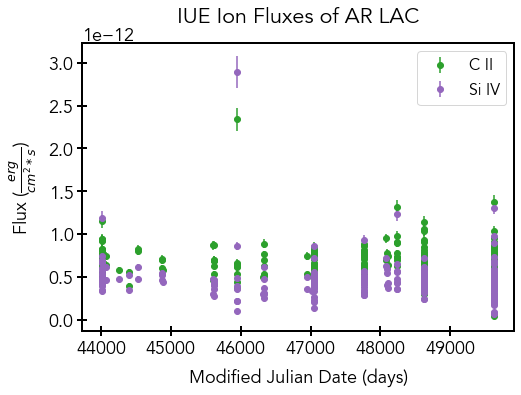

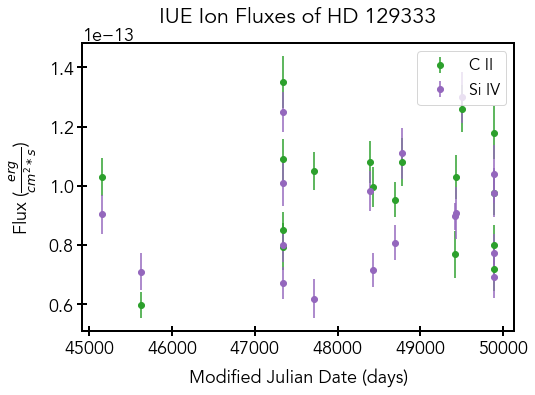

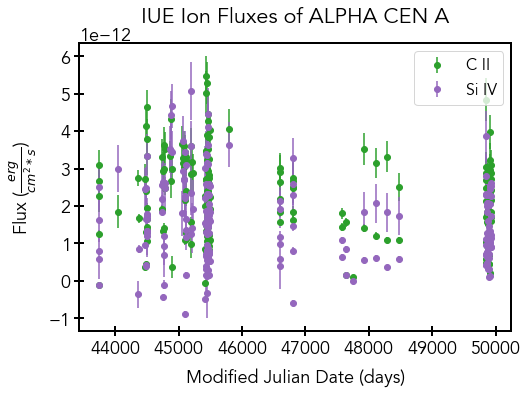

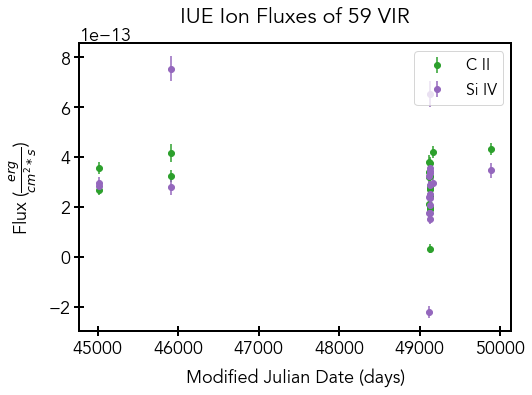

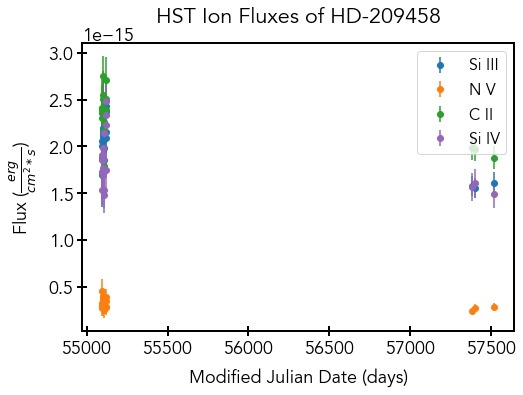

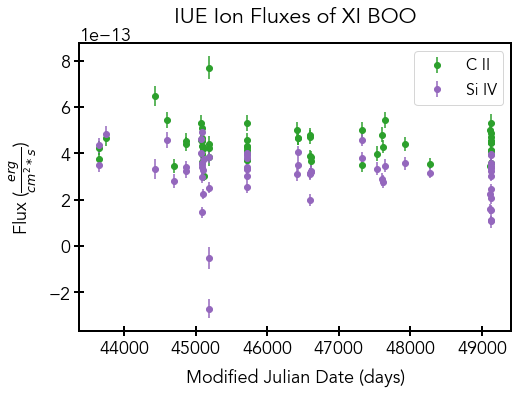

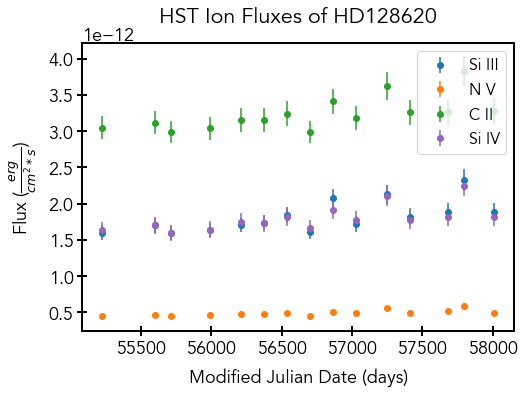

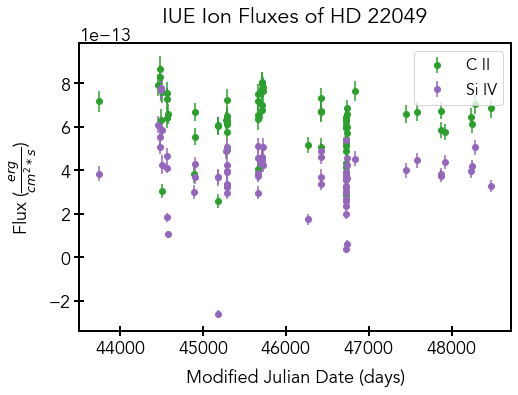

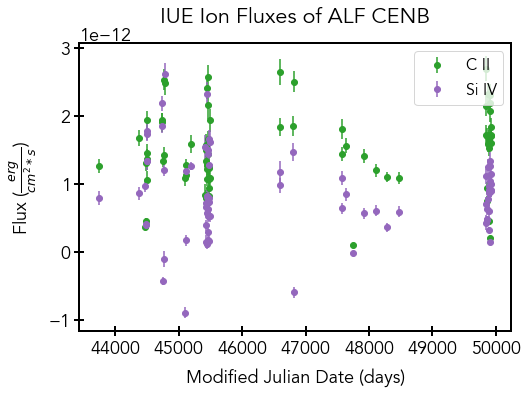

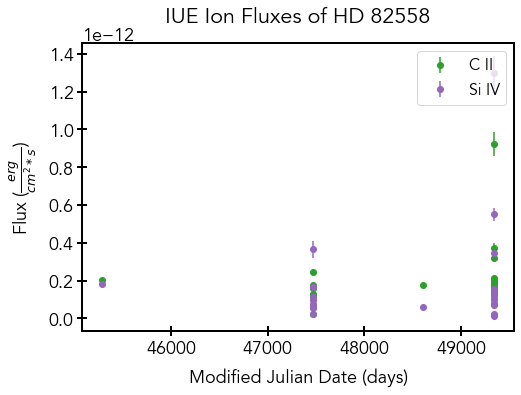

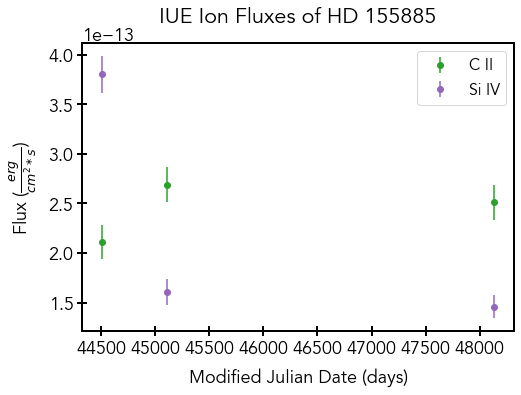

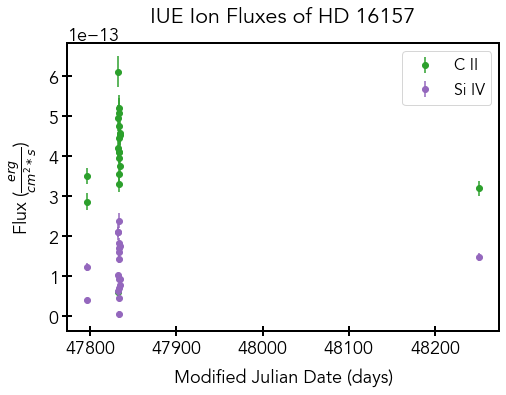

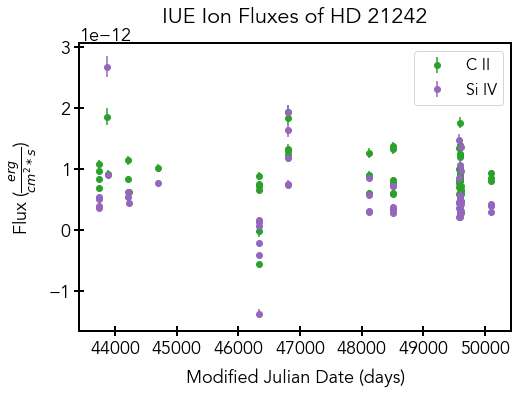

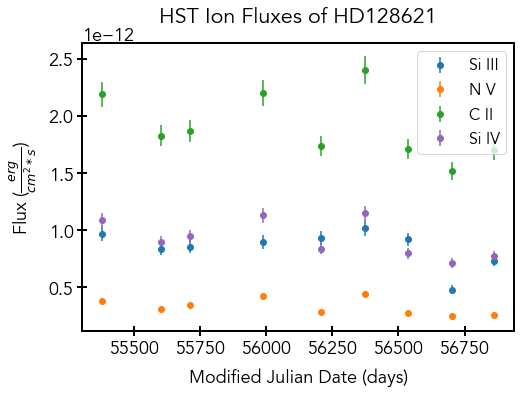

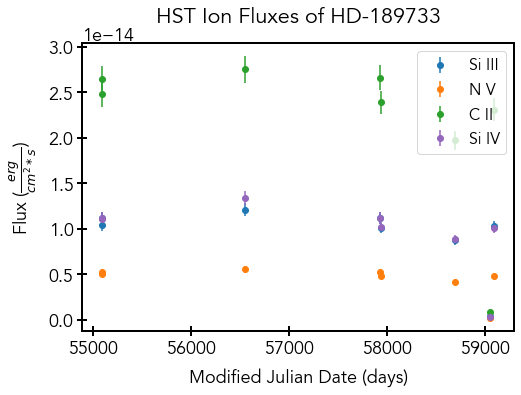

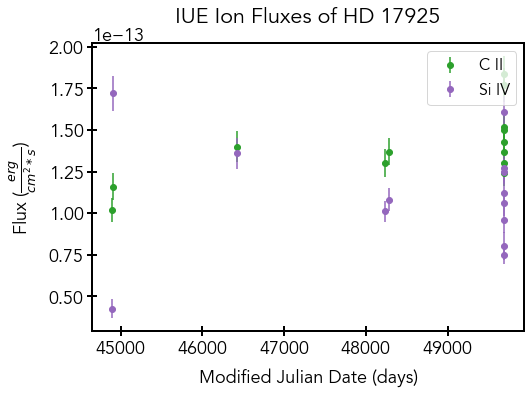

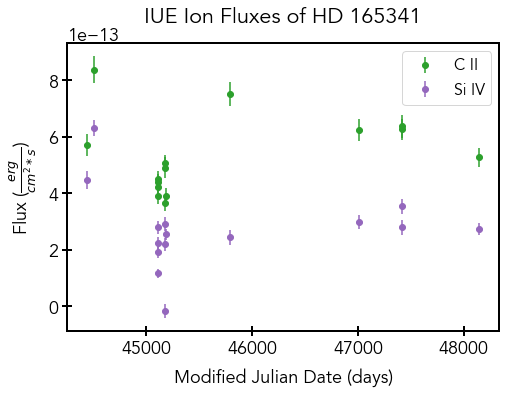

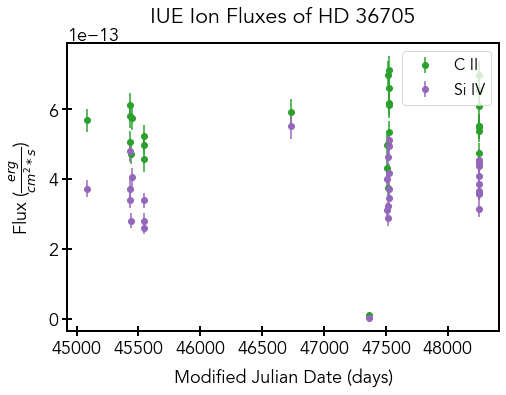

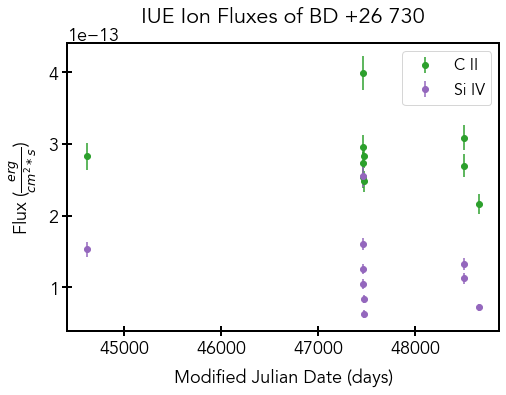

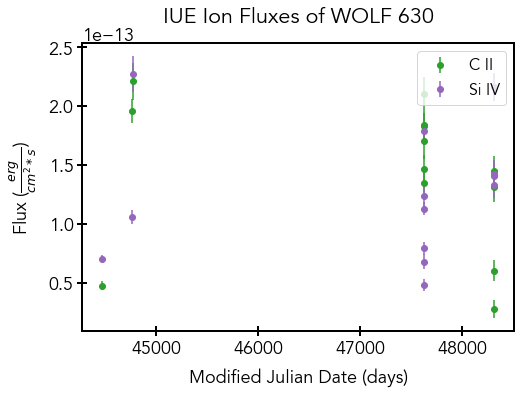

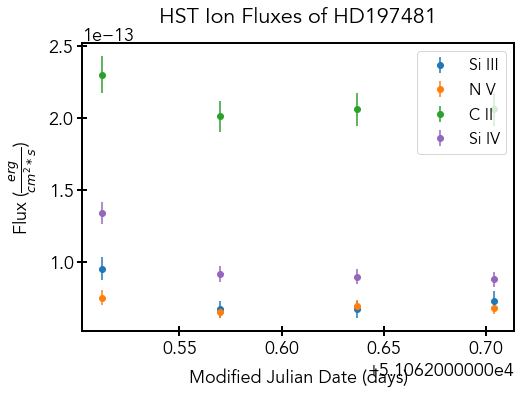

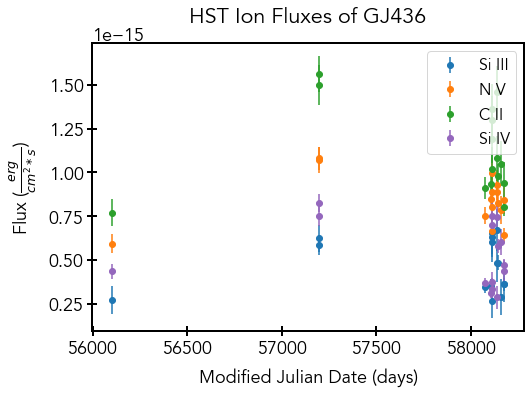

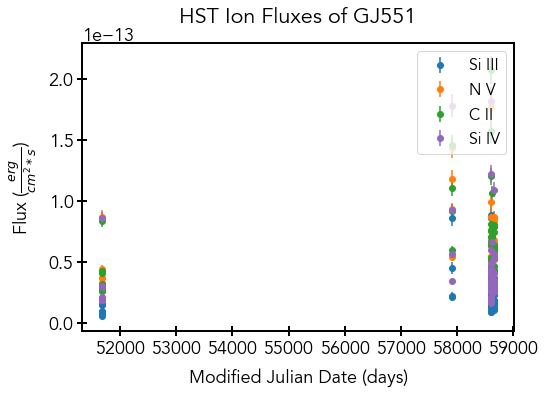

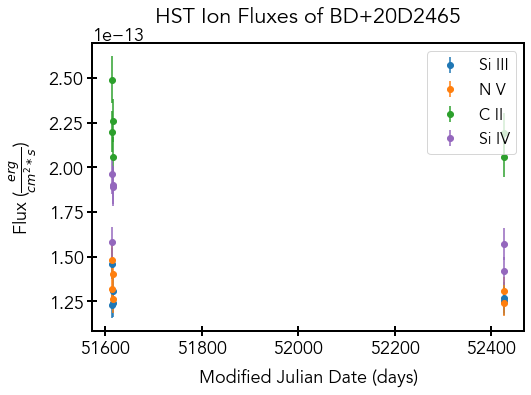

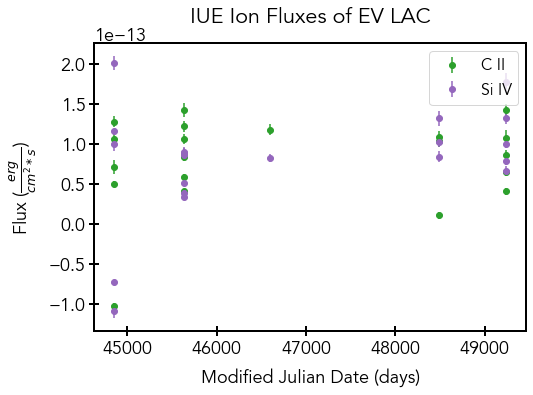

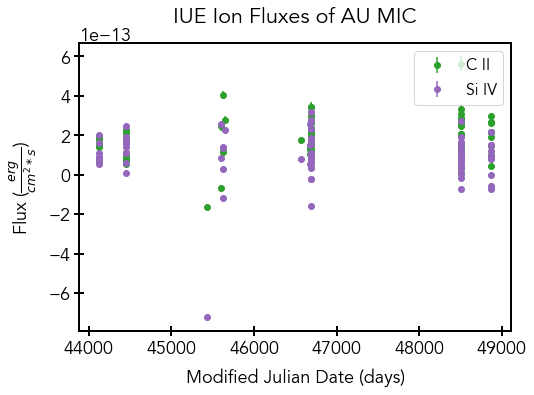

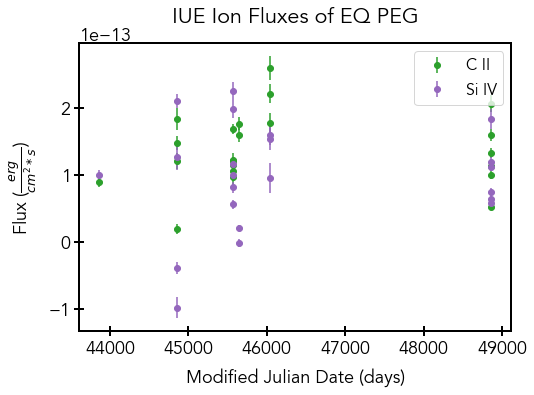

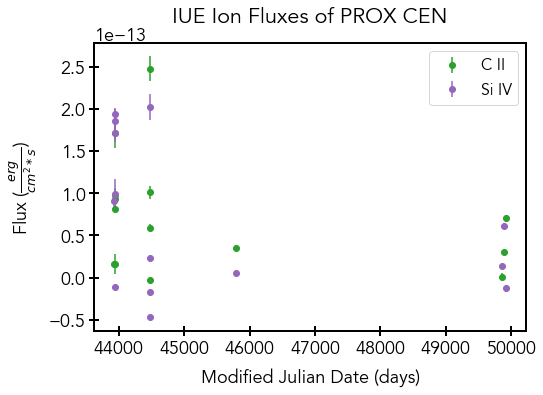

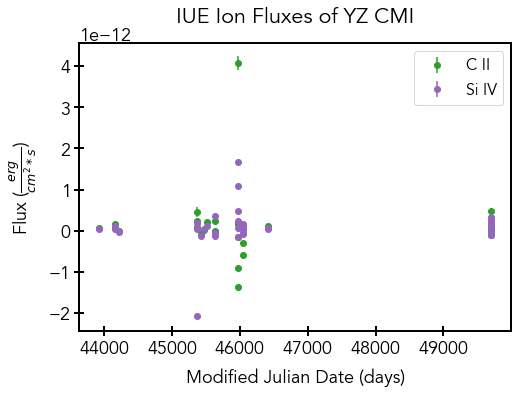

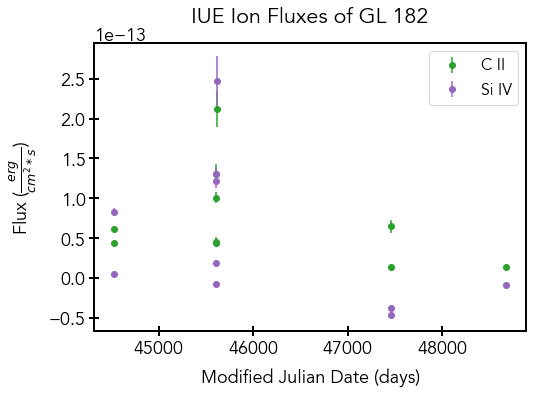

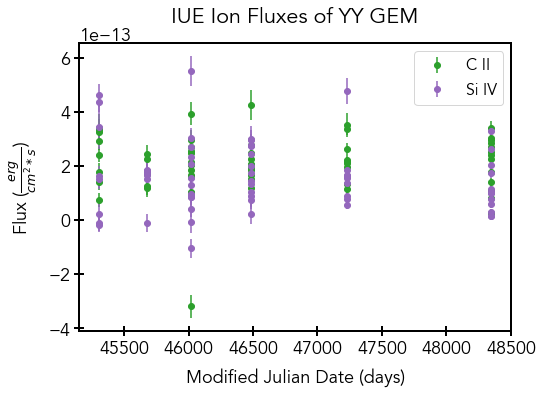

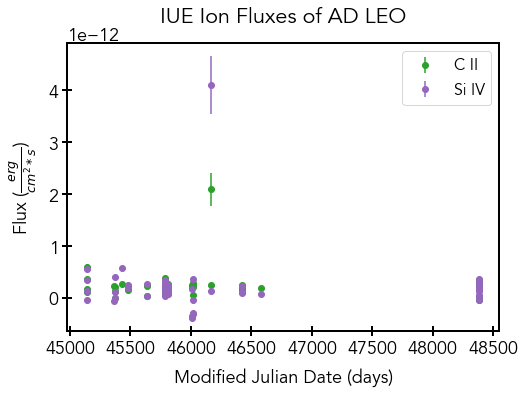

In [17]:
spec_types = ['F','G','K','M']
raw_data = []

######################################################################################################################
# FILE READING #

# Repeats for all spectral types
for tp in spec_types:
    print('Opening ' + tp + ' Type Stars')
    
    # Setup Paths
    data_folder = '/Users/leokamgar/jupyter/APPM 3310/APPM-3310-Final-Project/RAW_DATA/' + tp + '_STARS/'
    raw_plot_folder = '/Users/leokamgar/jupyter/APPM 3310/APPM-3310-Final-Project/PLOTS/RAW/' + tp + '_STARS/'
    wavelet_plot_folder = '/Users/leokamgar/jupyter/APPM 3310/APPM-3310-Final-Project/PLOTS/WAVELET/' + tp + '_STARS/'
    fft_plot_folder = '/Users/leokamgar/jupyter/APPM 3310/APPM-3310-Final-Project/PLOTS/FFT/' + tp + '_STARS/'
    
    # Opens all files within the spectral data folders
    for filename in os.listdir(data_folder):
        if filename == '.DS_Store': continue
        
        data_file = data_folder + filename
        
        # Reads data, if error, then prints and moves on to next file
        try:
            data = pd.read_csv(data_file)
        except Exception as e: 
            print(e)
            print('Error with reading: ' + filename + ' in ' + tp + ' type stars!')
            continue
        
        # Sorts data in ascending order by Time
        data = data.sort_values(by=['MJDstart'], axis=0, ascending=True)
        
        # Determines if from IUE or HST telescope
        if 'iue' in filename:
            iue = True
        else:
            iue = False
            
######################################################################################################################
# DATA RETRIEVAL #

        # Set arrays from data set
        time = data['MJDstart']
        flux_Si3 = data[' F(Si3)']
        error_Si3 = data['  E(Si3)']
        background_Si3 = data['  B(Si3)']
        flux_N5 = data['  F(N5)']
        error_N5 = data['  E(N5)']
        background_N5 = data['  B(N5)']
        flux_C2 = data['  F(C2)']
        error_C2 = data['  E(C2)']
        background_C2 = data['  B(C2)']
        flux_Si4 = data['  F(Si4)']
        error_Si4 = data['  E(Si4)']
        background_Si4 = data['  B(Si4)']
        col_name = data['Targname']
        
######################################################################################################################
# DATA CLEANUP AND STORING #

        # Cleans up name of star
        name = col_name[1].strip()
        # Converts Julien Date (What IUE Data Represented As) to Modified Julian Date
        if iue:
            time = time - 2400000.5
            
        raw_data.append([name, "IUE" if iue else "HST" ,time,flux_Si3,flux_N5,flux_C2,flux_Si4])
            
######################################################################################################################
# PLOTTING #
    
        mpl.rcParams['font.family'] = 'Avenir'
        plt.rcParams['font.size'] = 18
        plt.rcParams['axes.linewidth'] = 2
        colors = cm.get_cmap('tab10', 8)

        # Create figure and add axes object
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 1, 1])
        fig.patch.set_facecolor('#ffffff')

        # Scatter plot with error bars
        if not iue:
            ax.errorbar(time, flux_Si3, yerr=error_Si3, fmt='o', color=colors(0), label = r'Si III')
            ax.errorbar(time, flux_N5, yerr=error_N5, fmt='o', color=colors(1), label = r'N V')
        ax.errorbar(time, flux_C2, yerr=error_C2, fmt='o', color=colors(2), label = r'C II')
        ax.errorbar(time, flux_Si4, yerr=error_Si4, fmt='o', color=colors(3), label = r'Si IV')

        # Set tick formatting
        ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='inout')
        ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='inout')
        ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='inout')
        ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='inout')

        # Title the plot and axes
        if iue:
            ax.set_title('IUE Ion Fluxes of ' + name, y=1.05)
        else:
            ax.set_title('HST Ion Fluxes of ' + name, y=1.05)
        ax.set_xlabel('Modified Julian Date (days)', labelpad=10)
        ax.set_ylabel('Flux ($\\frac{erg}{cm^2 * s}$)', labelpad=10)

        ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=True, fontsize=16)
        
        # Save plot
        if not iue:
            plt.savefig(raw_plot_folder + 'HST_' + name + '.png', transparent=False, bbox_inches='tight')
        else:
            plt.savefig(raw_plot_folder + 'IUE_' + name + '.png', transparent=False, bbox_inches='tight')
            
        # Show plot
#         plt.show()

######################################################################################################################

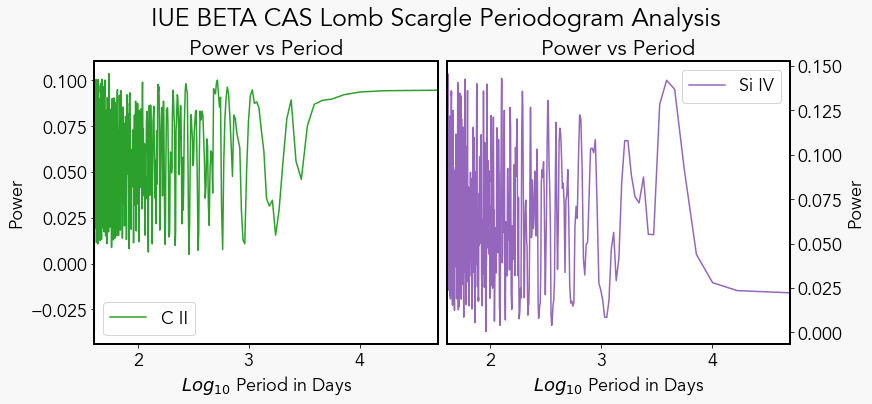

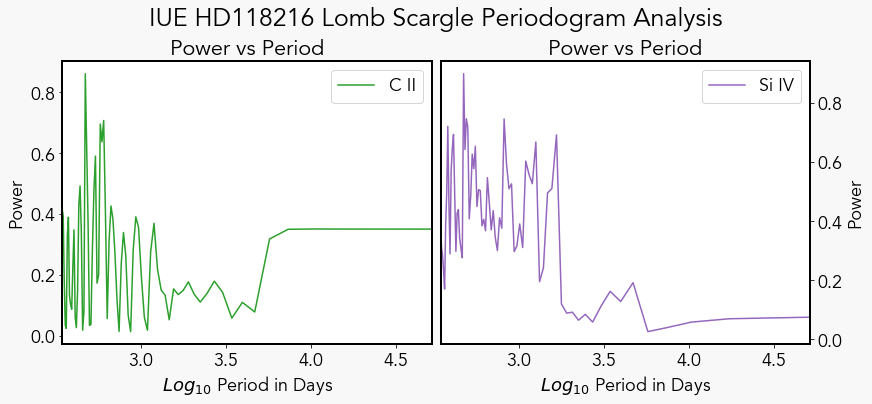

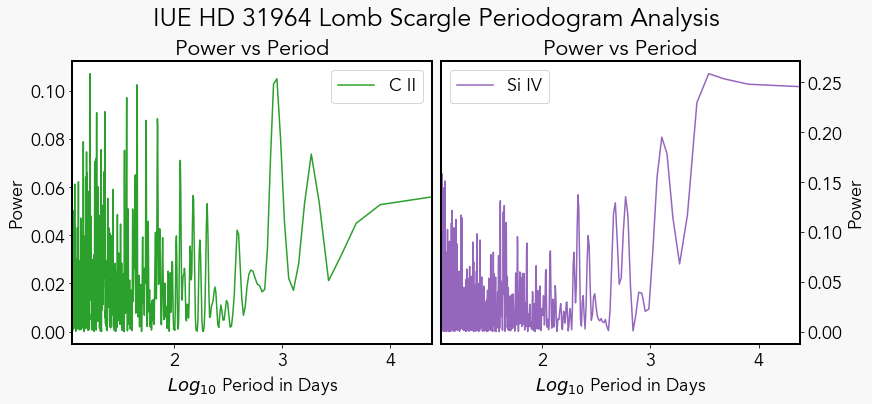

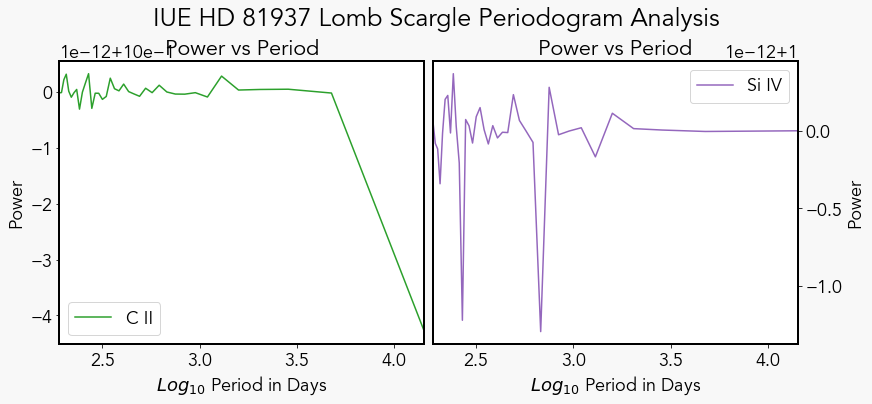

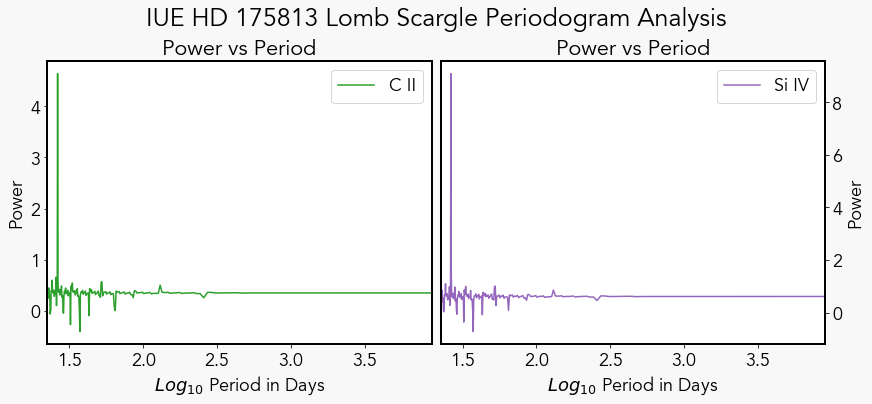

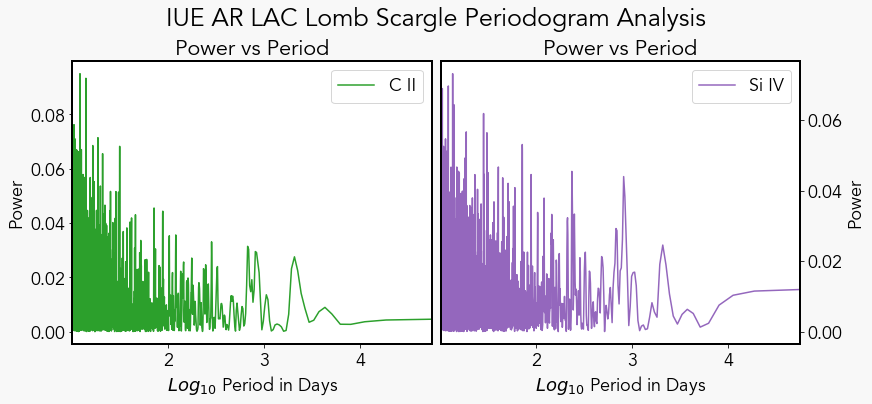

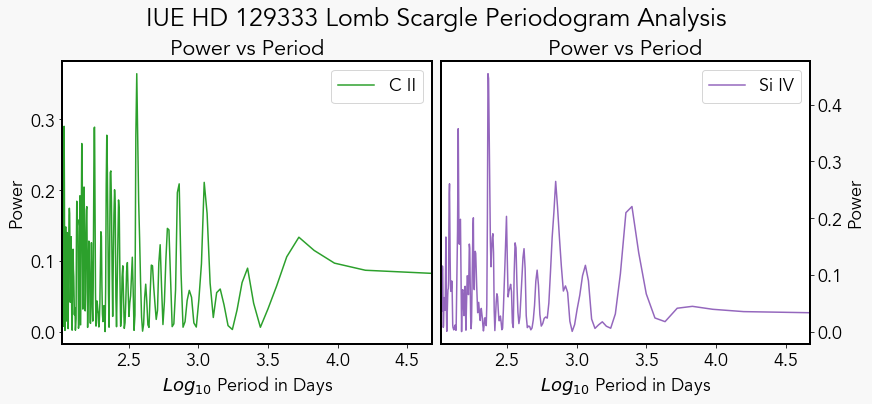

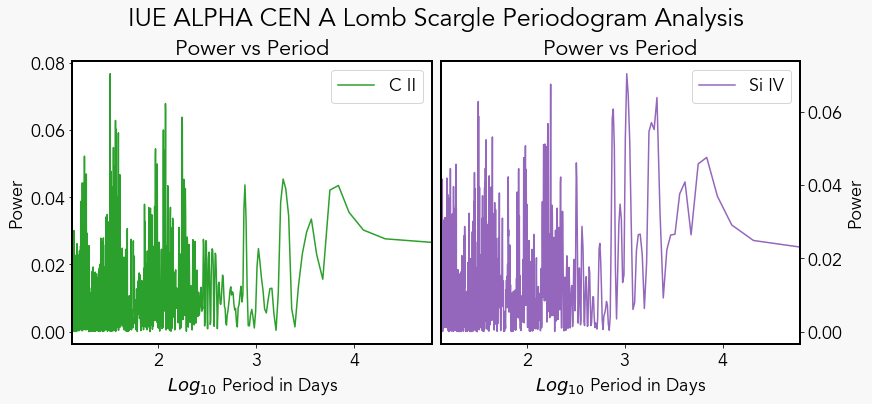

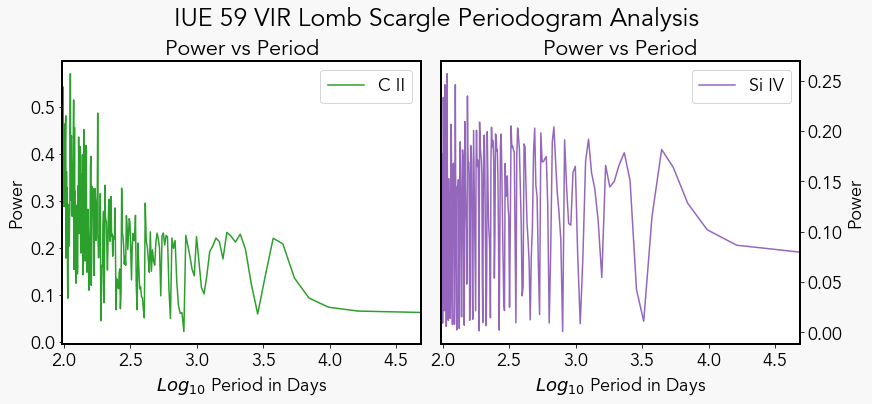

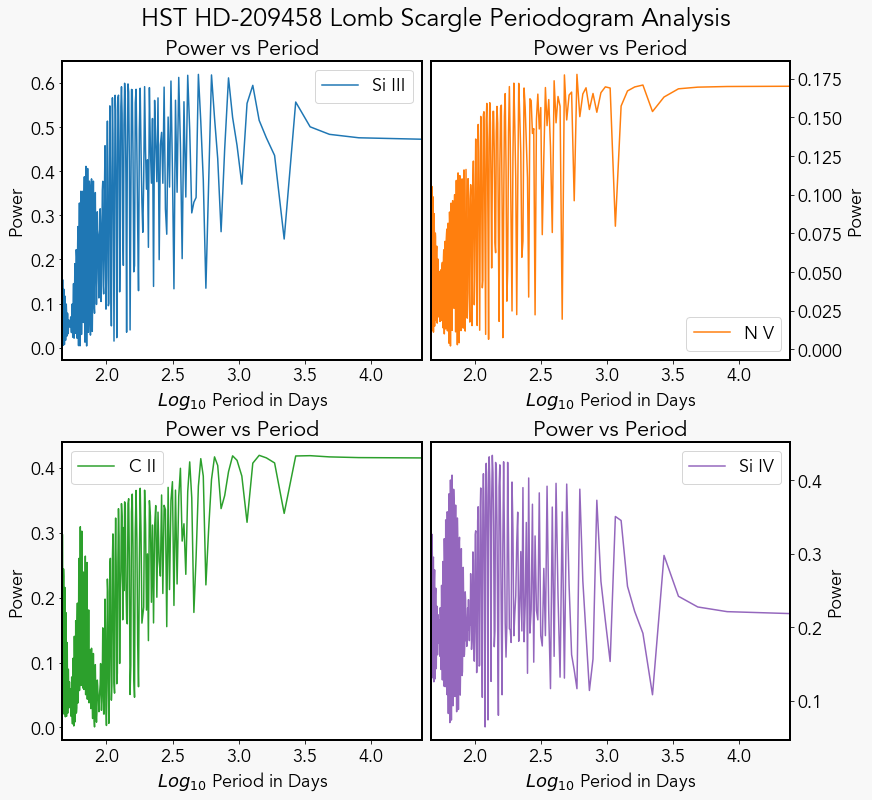

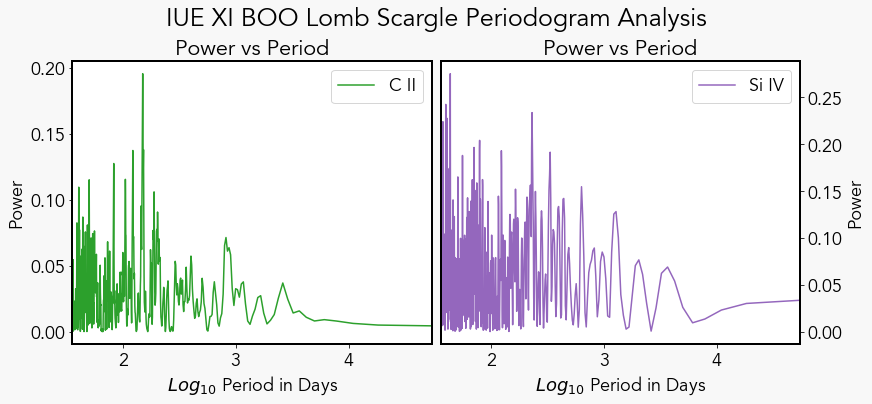

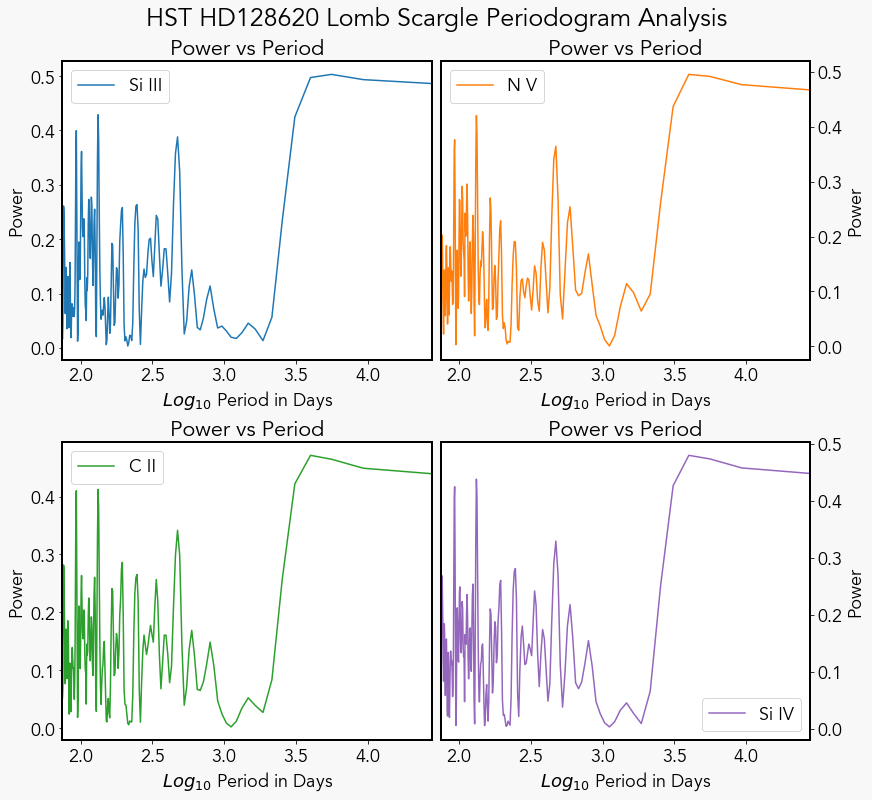

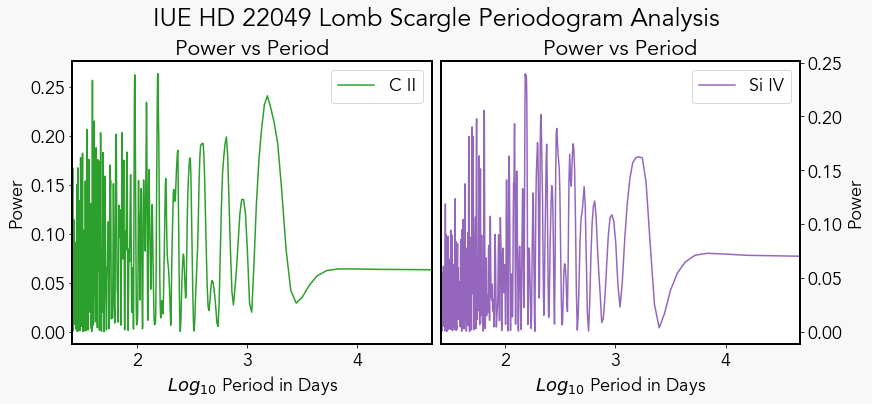

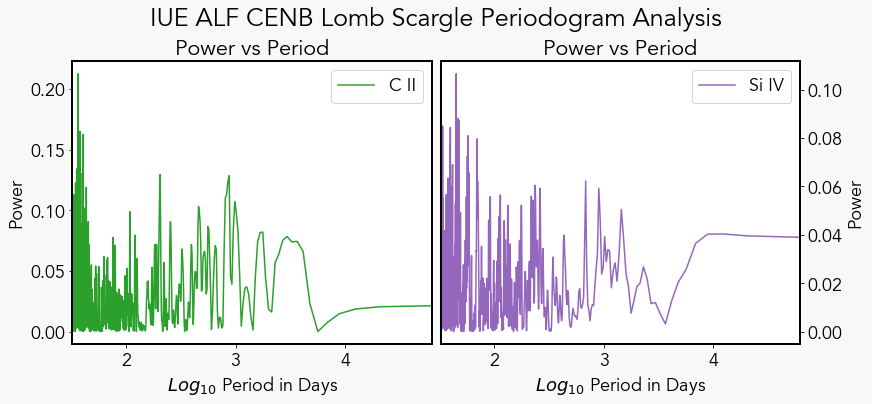

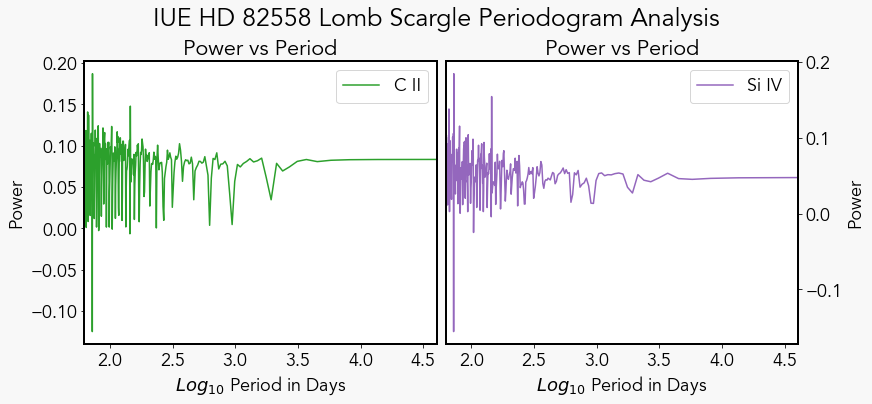

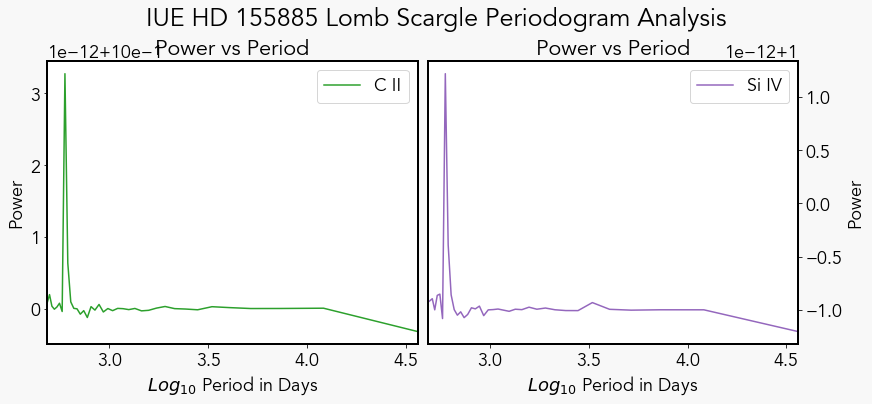

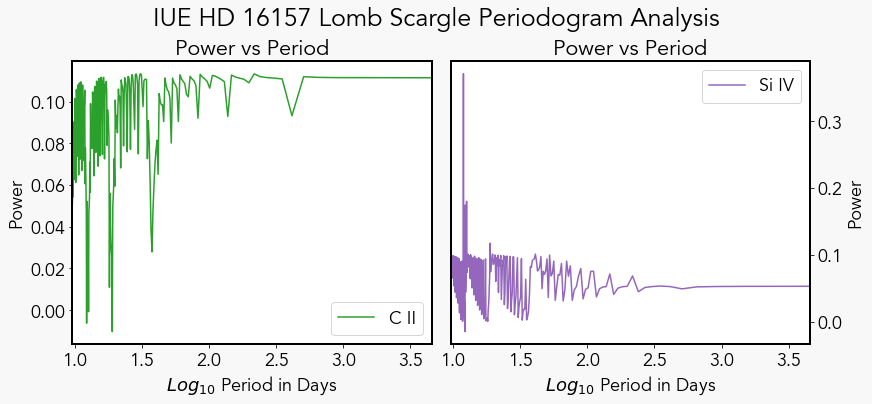

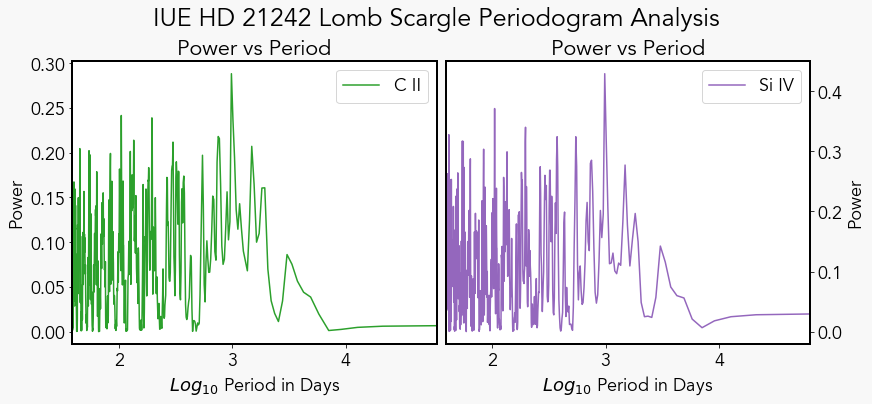

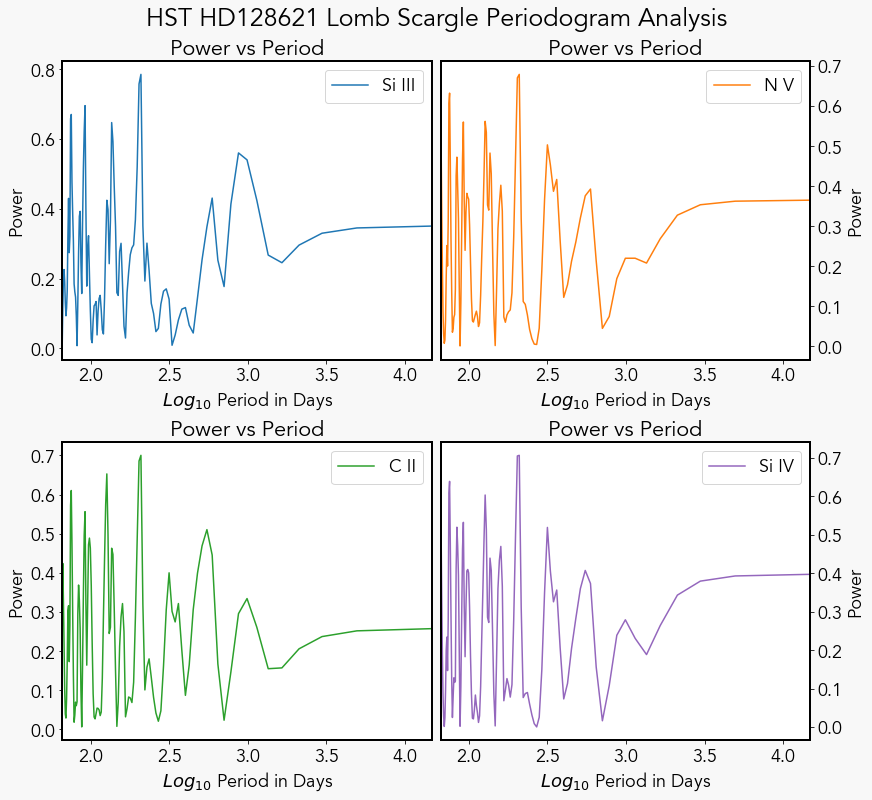

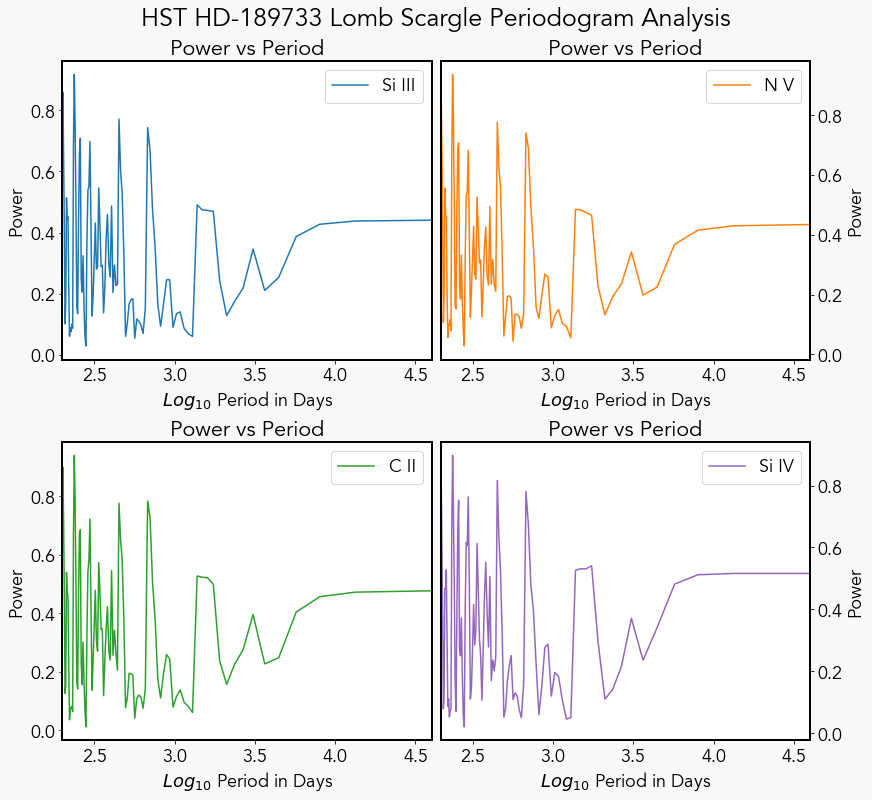

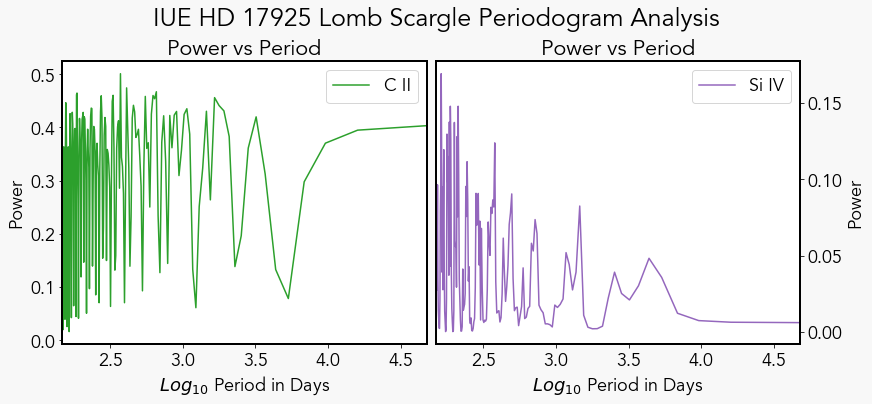

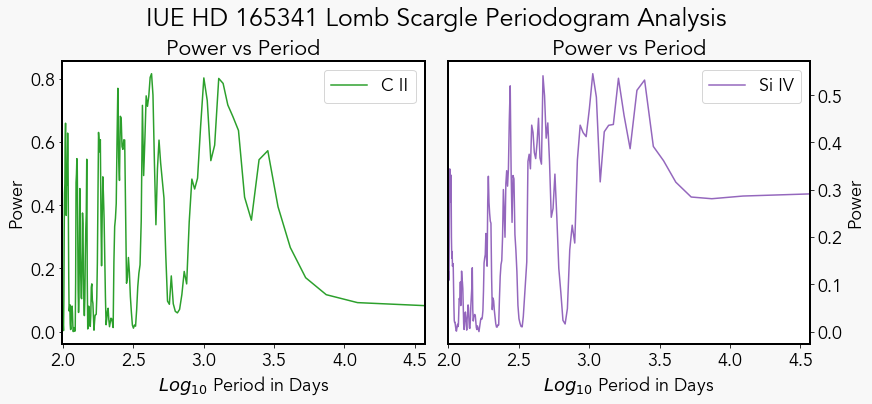

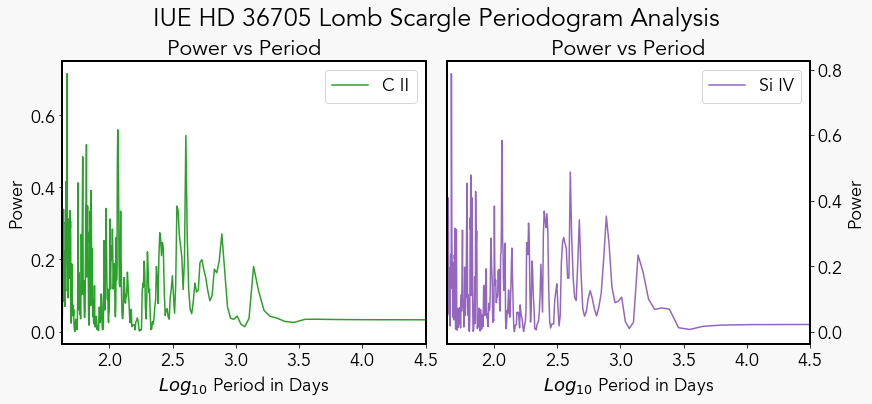

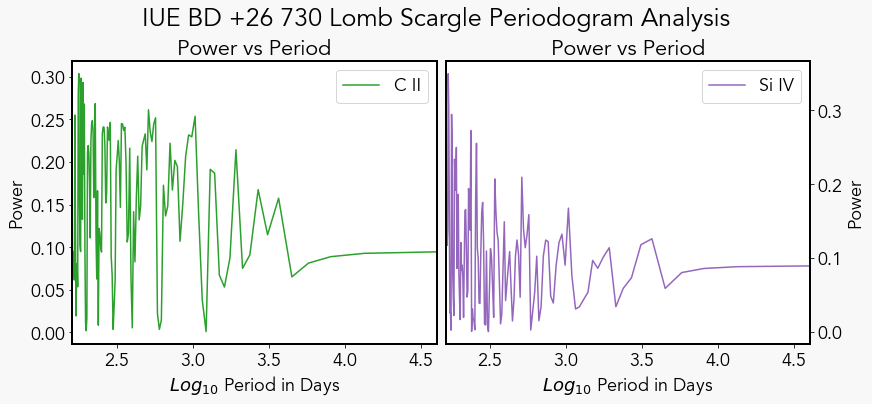

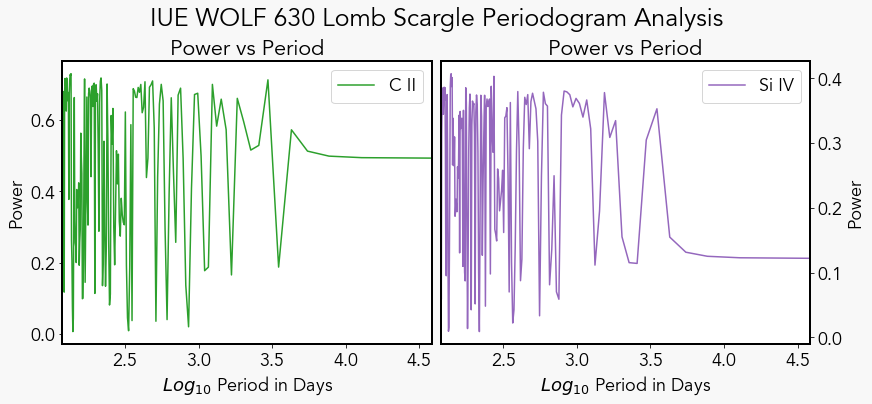

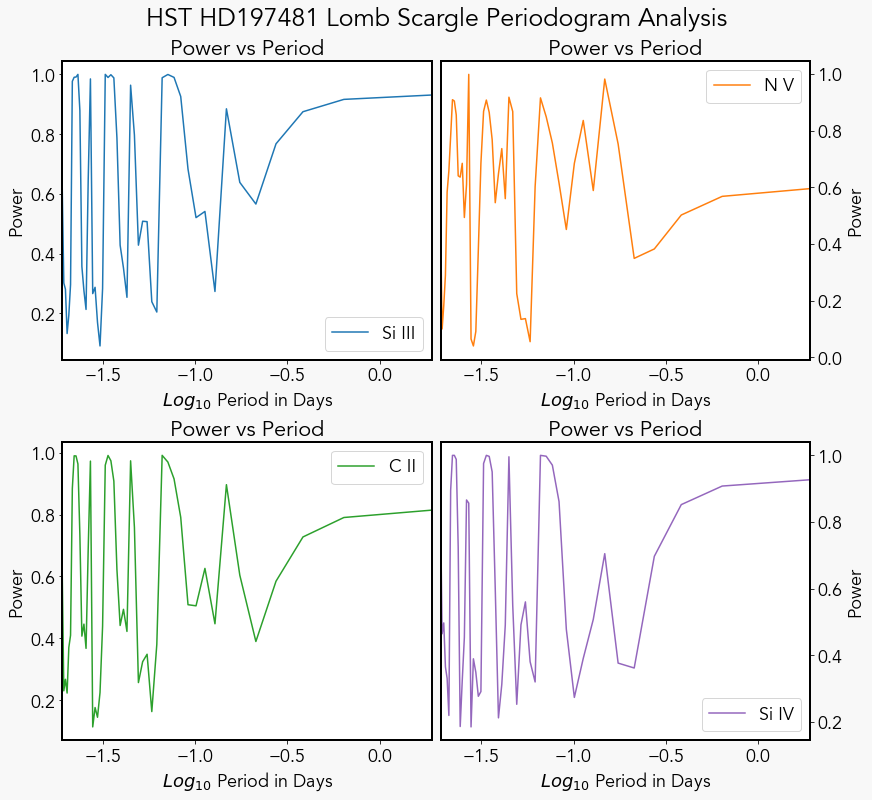

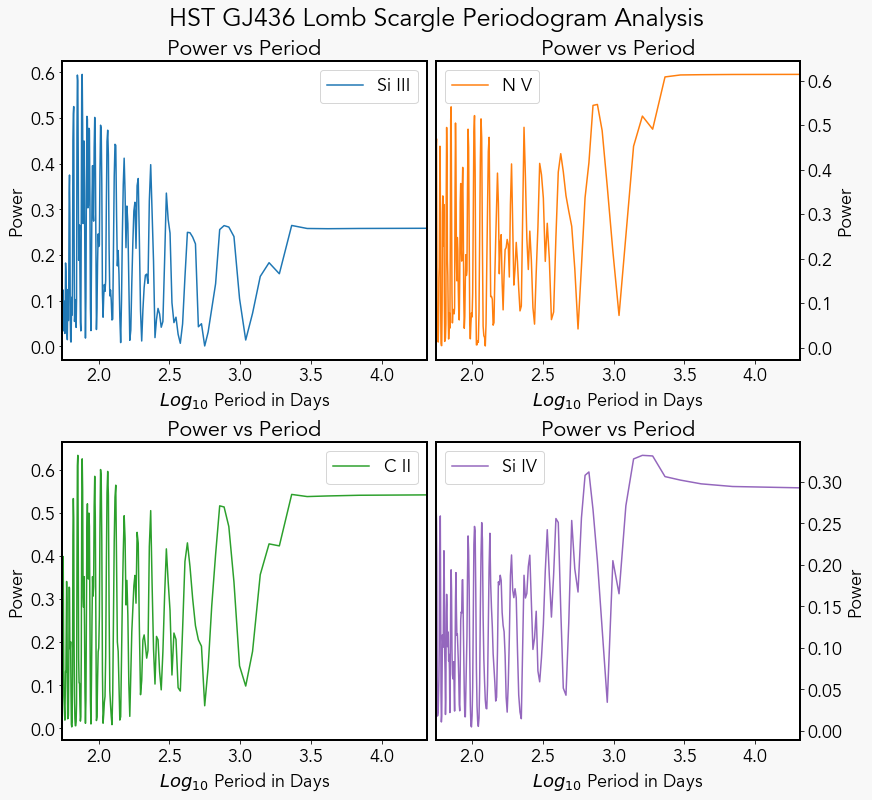

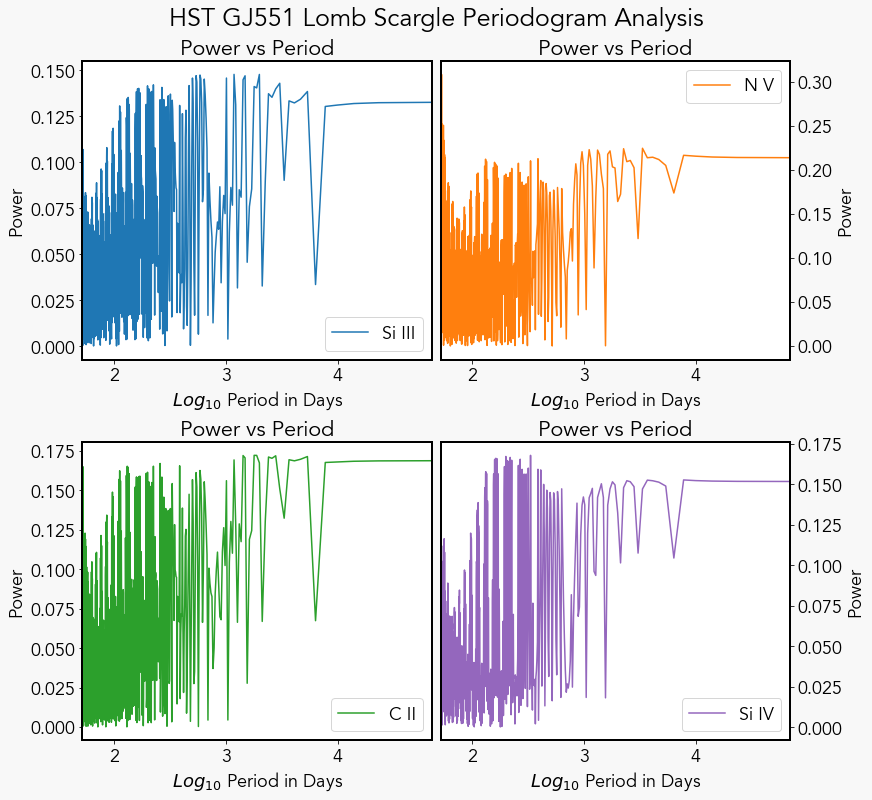

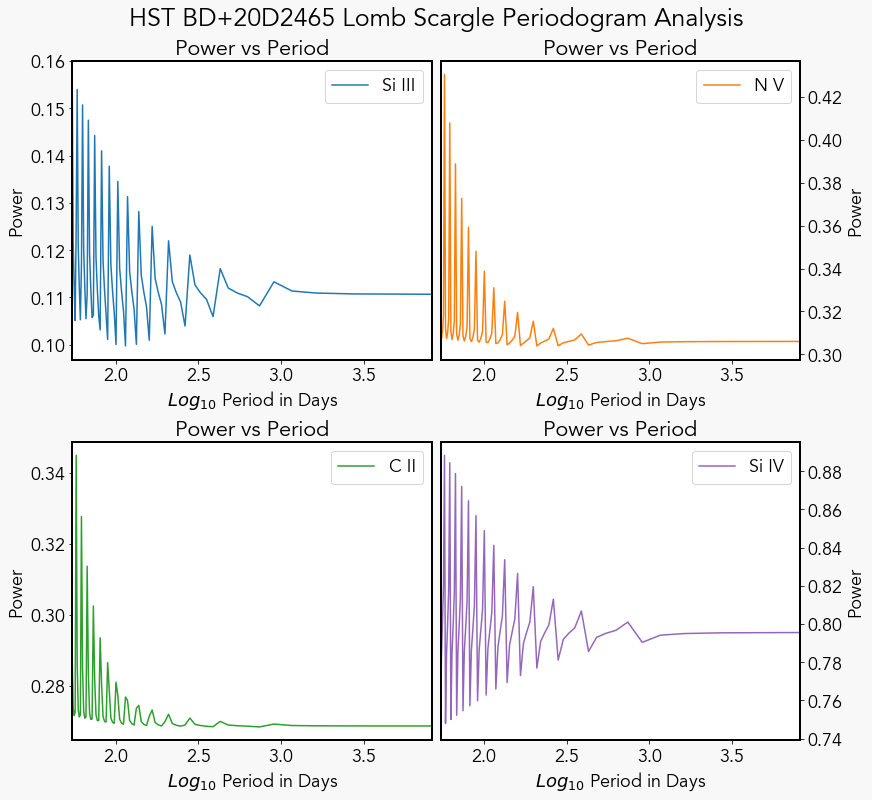

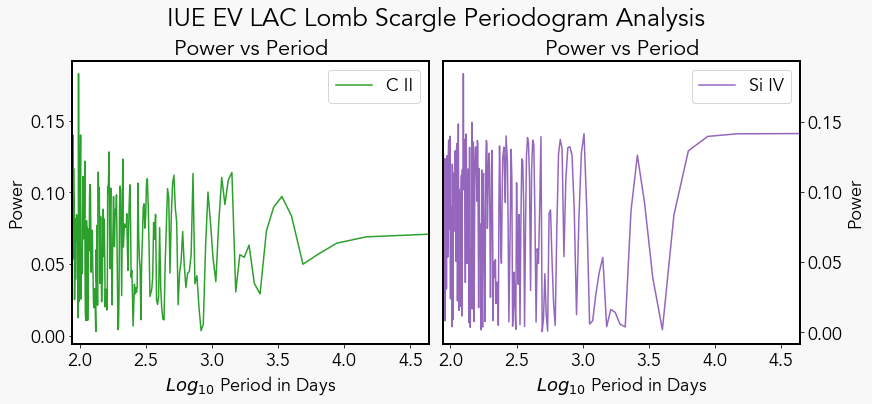

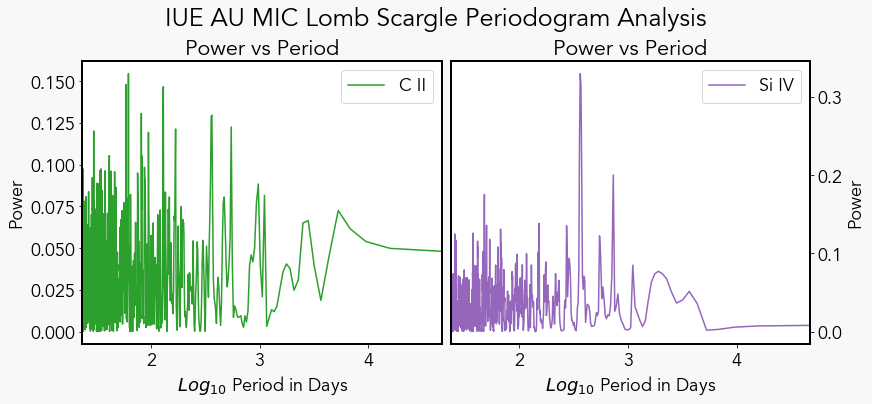

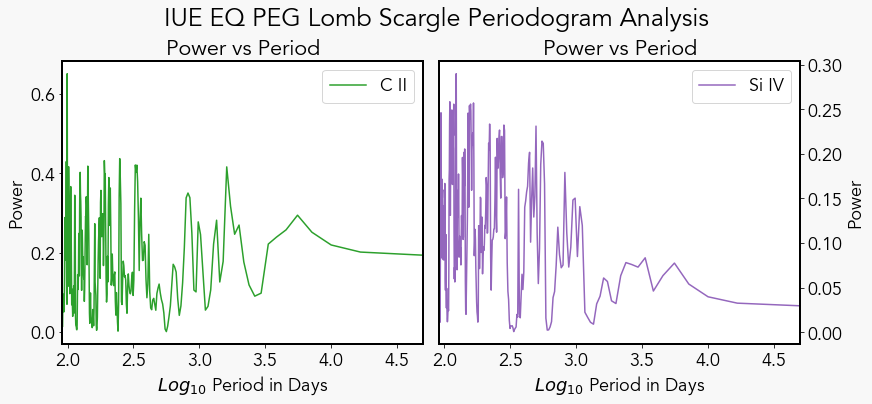

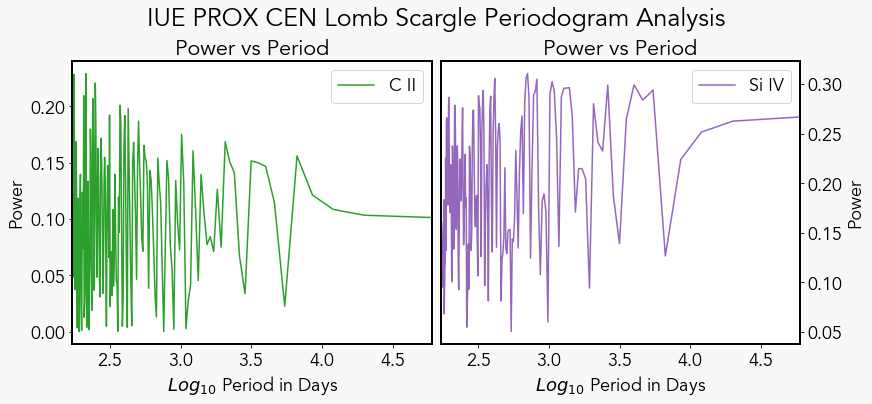

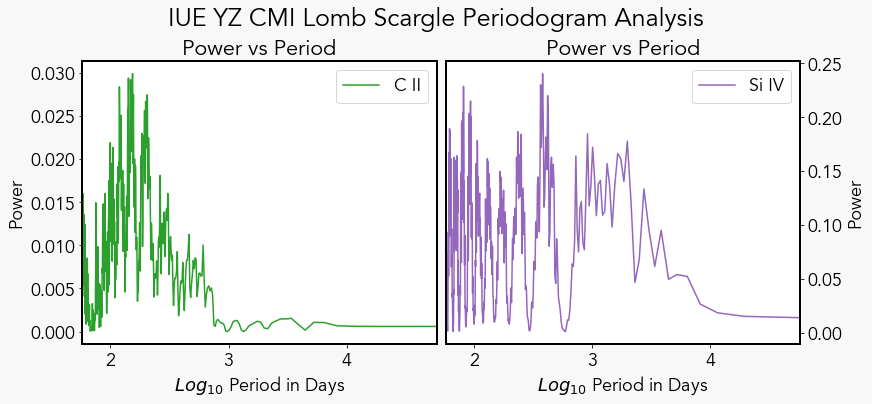

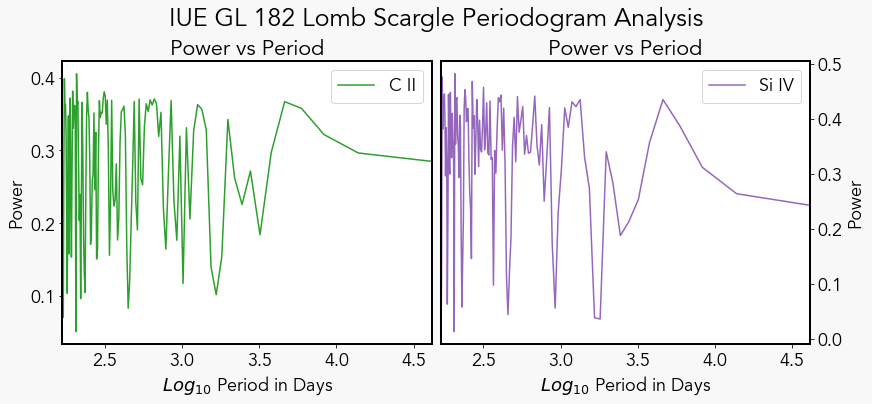

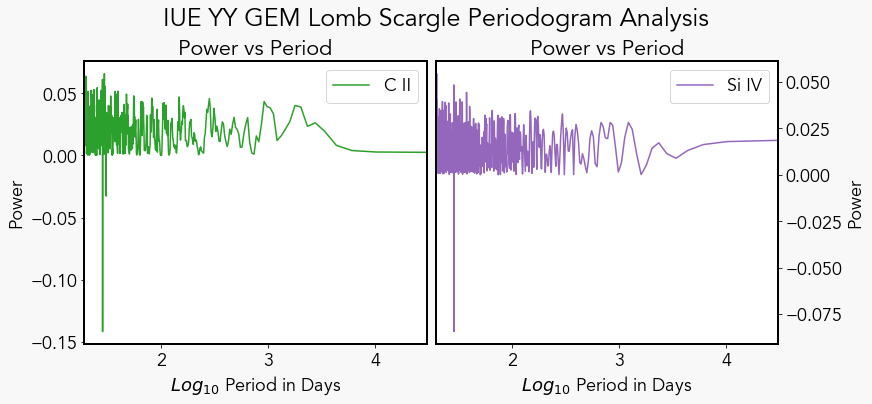

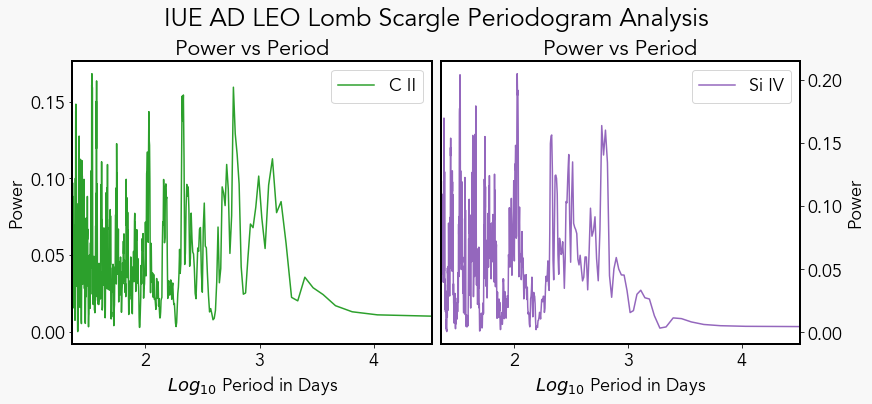

In [19]:
######################################################################################################################
# Fast Fourier Transform to Compare #

# raw_data[n] format:
# [0: name, 1: telescope, 2: time (x-axis), 3: Si3 flux, 4: N5 flux, 5: C2 flux, 6: Si4 flux]

for n in range(len(raw_data)):
    
    # Perform FFT using Lomb Scargle Periodogram Analysis package
    try:
        LombScargle(raw_data[n][2], raw_data[n][3]).autopower()
        LombScargle(raw_data[n][2], raw_data[n][4]).autopower()
        LombScargle(raw_data[n][2], raw_data[n][5]).autopower()
        LombScargle(raw_data[n][2], raw_data[n][6]).autopower()
    except Exception as e: 
        print(e)
        print('Error with: ' + raw_data[n][0])
        continue
        
    frequencySi3, powerSi3 = LombScargle(raw_data[n][2], raw_data[n][3]).autopower()
    frequencyN5, powerN5 = LombScargle(raw_data[n][2], raw_data[n][4]).autopower()
    frequencyC2, powerC2 = LombScargle(raw_data[n][2], raw_data[n][5]).autopower()
    frequencySi4, powerSi4 = LombScargle(raw_data[n][2], raw_data[n][6]).autopower()
    
    # Invert frequency for period
    periodSi3 = 1 / frequencySi3
    periodN5 = 1 / frequencyN5
    periodC2 = 1 / frequencyC2
    periodSi4 = 1 / frequencySi4
    
    # Log periods
    logPeriodSi3 = np.log10(periodSi3)
    logPeriodN5 = np.log10(periodN5)
    logPeriodC2 = np.log10(periodC2)
    logPeriodSi4 = np.log10(periodSi4)

    if 'HST' == raw_data[n][1]:
        fig, axs = plt.subplots(2, 2, figsize=(12,11), constrained_layout = True)
        fig.suptitle(f'{raw_data[n][1]} {raw_data[n][0]} Lomb Scargle Periodogram Analysis', fontsize=25)
        fig.patch.set_facecolor('#f8f8f8')
        
        axs[0, 0].plot(logPeriodSi3, powerSi3, color=colors(0), label='Si III')
        axs[0, 0].legend()
        axs[0, 0].set_title('Power vs Period')
        axs[0, 0].set(xlabel='$Log_{10}$ Period in Days', ylabel='Power')
        axs[0, 0].set_xlim([min(logPeriodSi3), max(logPeriodSi3)])
        axs[0, 1].plot(logPeriodN5, powerN5, color=colors(1), label='N V')
        axs[0, 1].legend()
        axs[0, 1].yaxis.set_label_position("right")
        axs[0, 1].yaxis.tick_right()
        axs[0, 1].set_title('Power vs Period')
        axs[0, 1].set(xlabel='$Log_{10}$ Period in Days', ylabel='Power')
        axs[0, 1].set_xlim([min(logPeriodN5), max(logPeriodN5)])
        axs[1, 0].plot(logPeriodC2, powerC2, color=colors(2), label='C II')
        axs[1, 0].legend()
        axs[1, 0].set_title('Power vs Period')
        axs[1, 0].set(xlabel='$Log_{10}$ Period in Days', ylabel='Power')
        axs[1, 0].set_xlim([min(logPeriodC2), max(logPeriodC2)])
        axs[1, 1].plot(logPeriodSi4, powerSi4, color=colors(3), label='Si IV')
        axs[1, 1].legend()
        axs[1, 1].yaxis.set_label_position("right")
        axs[1, 1].yaxis.tick_right()
        axs[1, 1].set_title('Power vs Period')
        axs[1, 1].set(xlabel='$Log_{10}$ Period in Days', ylabel='Power')
        axs[1, 1].set_xlim([min(logPeriodSi4), max(logPeriodSi4)])
        
        plt.show()
    else: 
        fig, axs = plt.subplots(1, 2, figsize=(12,5.5), constrained_layout = True)
        fig.suptitle(f'{raw_data[n][1]} {raw_data[n][0]} Lomb Scargle Periodogram Analysis', fontsize=25)
        fig.patch.set_facecolor('#f8f8f8')

        axs[0].plot(logPeriodC2, powerC2, color=colors(2), label='C II')
        axs[0].legend()
        axs[0].set_title('Power vs Period')
        axs[0].set(xlabel='$Log_{10}$ Period in Days', ylabel='Power')
        axs[0].set_xlim([min(logPeriodC2), max(logPeriodC2)])
        axs[1].plot(logPeriodSi4, powerSi4, color=colors(3), label='Si IV')
        axs[1].legend()
        axs[1].yaxis.set_label_position("right")
        axs[1].yaxis.tick_right()
        axs[1].set_title('Power vs Period')
        axs[1].set(xlabel='$Log_{10}$ Period in Days', ylabel='Power')
        axs[1].set_xlim([min(logPeriodSi4), max(logPeriodSi4)])
        
        plt.show()
        
    plot_loc = f'Star_Properties/Periodicity_Graph_Panels/{raw_data[n][0]}.png'
    plot_loc = plot_loc.replace(" ", "_")
    plt.savefig(plot_loc)

In [ ]:
######################################################################################################################
# Wavelet Transform #